<style>
tt {
    font-family:
    "FantasqueSansMono Nerd Font",
    "Courier Prime",
    "Courier New",
    "Inconsolata",
    "Lucida Console",
    "Menlo",
    "Monaco", 
    monospace;
    color: "black";
    font: 10px;
}

alert {
    display: inline-block;
}
    
.alert-block{
    margin: 20px;
    width: 92%;
    padding: 15px;
    border-radius: 4px;
    font: 16px Tahoma, Alegreya, Garamond, Times;
    font-weight: 400;
}

.alert-info {
    color: #0399A9;
    background: #B2EBF3;
    border: 2px solid #4FD1E1;
}

.alert-warning {
    color: #F67C00;
    background: #FFE0B2;
    border: 2px solid #FFC165;
}

.alert-danger {
    color: #C4453E;
    background: #F7CFD3;
    border: 2px solid #E29C9B;
}

.alert-success {
    color: #388E3C;
    background: #C8E6C9;
    border: 2px solid #81C784;
}
</style>

# **Introduction to py_fatigue**

`py_fatigue` is a repository developed for rainflow cycle counting and cyclic stress analysis (fatigue and crack-growth) based on timeseries signals.   


## *Basics of py_fatigue*

### Installing and Importing


`py_fatigue` package can be installed simply running 
`pip install py_fatigue` on the command prompt. If you want to directly install in Jupyter Notebook you can use `!pip install py_fatigue` in a code cell of Jupyter Notebook.


## Dependencies

**SUPERSEDED**. The dependency list below is valid for the previous versions of `py_fatigue`.

~~`py_fatigue` relies on the following PyPi packages~~
| ~~Package~~      | ~~Version~~ |
|--------------|---------|
| ~~numpy~~        | ~~1.21~~    |
| ~~plotly~~       | ~~5.6~~     |
| ~~pandas~~       | ~~1.4~~     |
| ~~numba~~        | ~~0.56~~    |
| ~~matplotlib~~   | ~~3.5~~     |
| ~~pydantic~~     | ~~1.10.2~~  |



## *Processing timeseries data using py_fatigue*
### *Rainflow Cycle Counting*
The data-driven fatigue lifetime analysis starts with the strain signals from strain gauges that is converted to stress-time series signal. The fatigue damage calculation depends on various features of this stress-time signal i.e **stress ranges** and **number of cycles**. Other features such as mean stress also affect the fatigue damage but they are accounted using various corrections such as **DNVGL-RP-C203 mean stress effect correction**, **Walker correction** and **Smith-Watson-Topper**



The stress-time series features for fatigue damage calculation are extracted  `rainflow counting* The working of `py_fatigue` is shown on a test data of stress-time series generated using a weibull distribution.

#### *Generating Random Signal*

A short random signal is generated in these sections for ease of visualization and understanding. This short signal will help understand the features of stress-time signal saved in the cycle counting object of the signal.

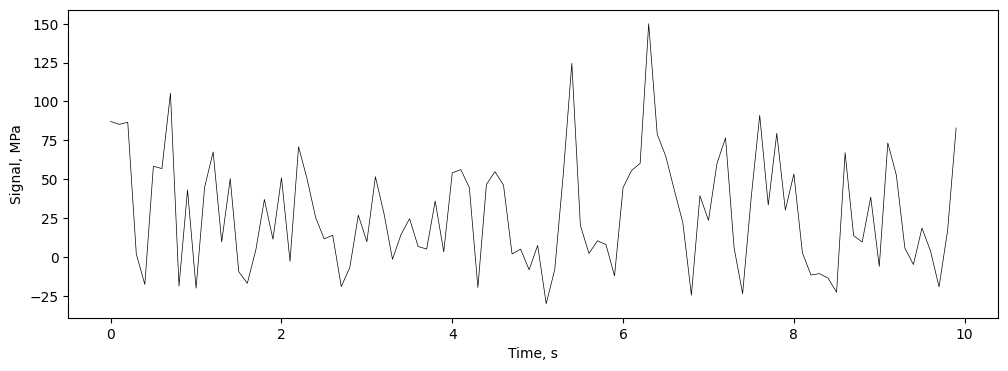

In [1]:
import py_fatigue as pf
import py_fatigue.testing as test
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



# Simulate a random signal
ts = test.get_sampled_time(duration=10, fs=10)
ss = test.get_random_data(
    t=ts, min_=-30, range_=180, random_type="weibull", a=2, seed=42
)
# Plot the signal
plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.plot(ts, ss, 'k', lw=0.5,label='Original Signal')
plt.xlabel("Time, s")
plt.ylabel("Signal, MPa")

plt.show()

#### *Rainflow Counting a Random Signal*
Rainflow counting is performed on the timeseries signal as per following algorithm. The original signal is first converted into a reversal series (the points where a signal reverses direction) and then counted as per the below given algorithm.


Mention the three point counting method.
Insert the table from the example (and the sample signal as shown above).

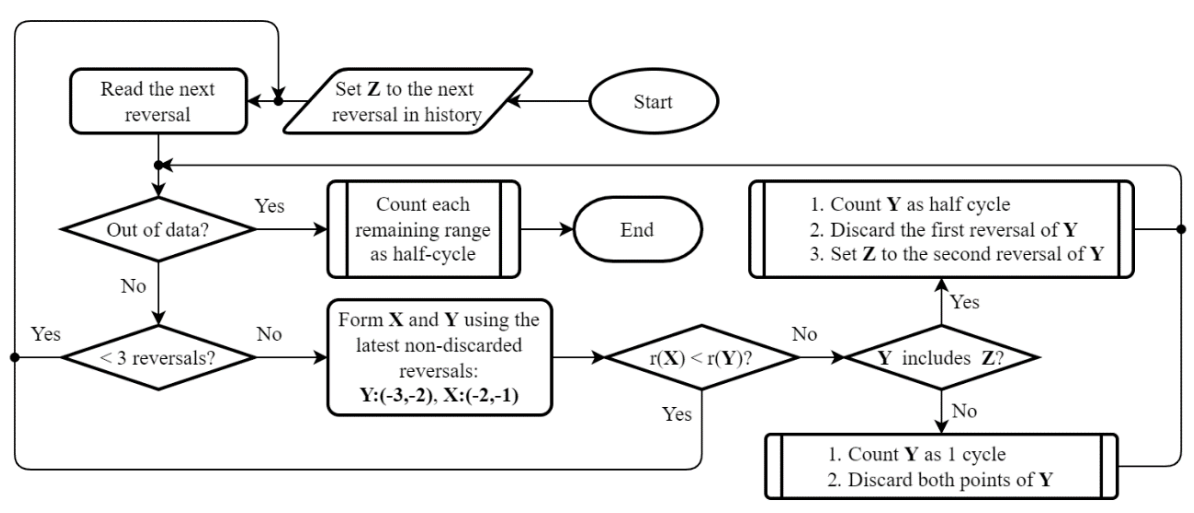
<div align="center"><em>Figure 1: Rainflow Counting Algorithm</em></div>

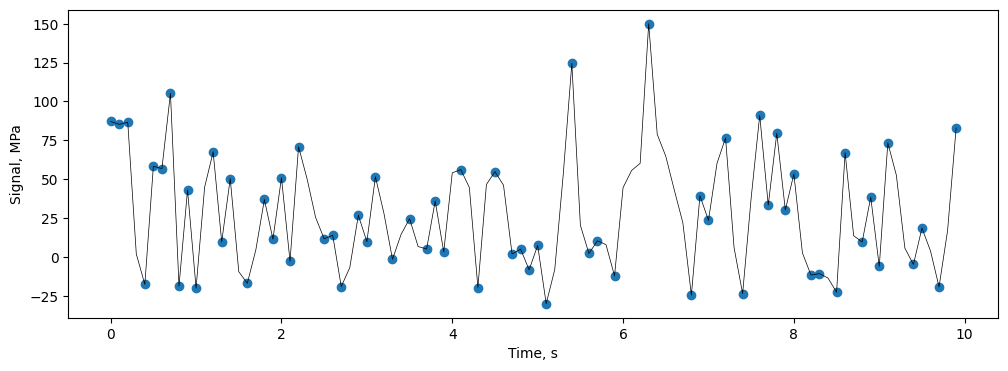

In [2]:
plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.plot(ts, ss, 'k', lw=0.5,label='Original Signal')
plt.xlabel("Time, s")
plt.ylabel("Signal, MPa")
ind_tp = pf.cycle_count.rainflow.findtp(ss)
plt.scatter(ts[ind_tp],ss[ind_tp])
plt.show()

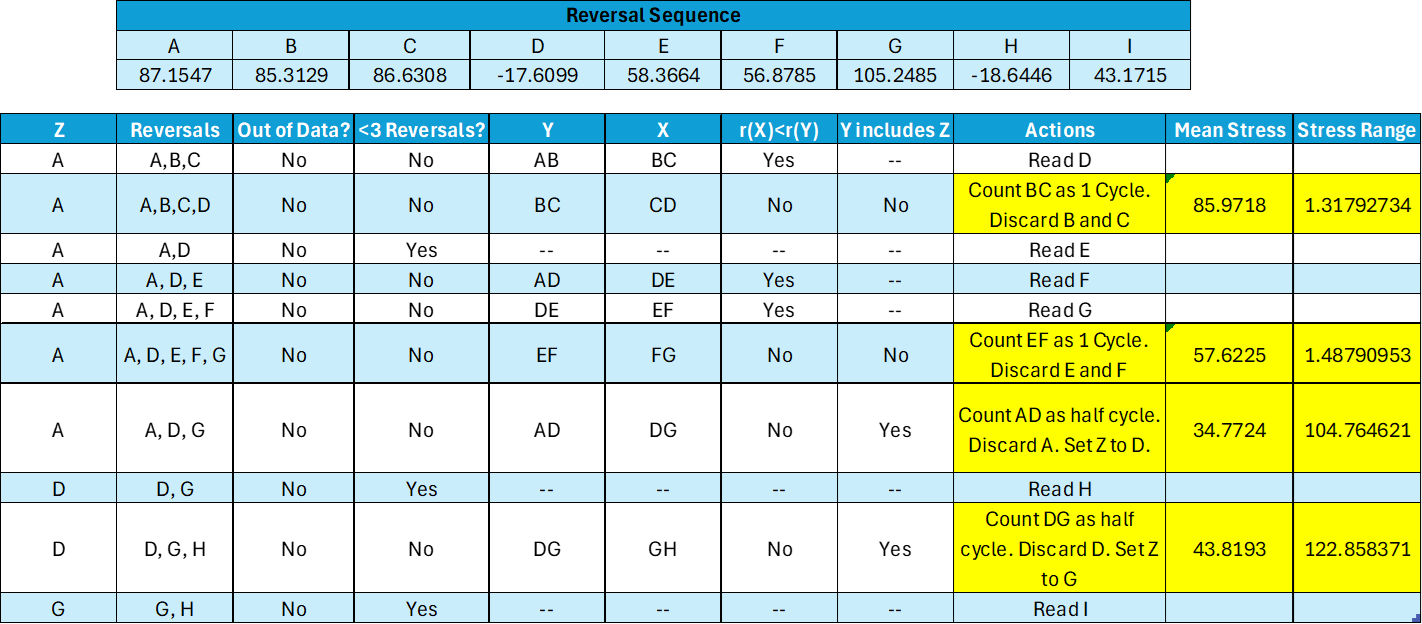
<div align="center"><em>Rainflow Counting Table </em></div>

The **Cycle Count Matrix from Timeseries Signal** is generated using `pf.CycleCount`. The timeseries stress signal is fed to `pf.CycleCount.from_timeseries()` method to get a cycle_count matrix. The implementation is shown on the short demo signal generated above.

In [3]:
# CycleCount definition
cycle_count_s = pf.CycleCount.from_timeseries(
    time=ts, data=ss, mean_bin_width=3, range_bin_width=3,
)
cycle_count_s

,None
Cycle counting object,
"largest full stress range, MPa",136.642467
"largest stress range, MPa",180.0
number of full cycles,28
number of residuals,8
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


The cycle counting matrix as seen above summarizes the time series signal in the form of number of cycles (completed/ closed cycles) categorized as large and small cycles, number of residuals, number of small cycles etc. Please note that the largest stress range could be from the half cycles. These details will be discussed more in detail in coming sections.

The cycle_count object can be converted into pandas dataframe using `cc.to_df()` method. The dataframe shows the full and half (residual) cycles along with their respective mean stress values and stress ranges without binning.

In [4]:
cycle_count_s.to_df().head()

,count_cycle,mean_stress,stress_range
0,1.0,85.971847,1.317927
1,1.0,57.622476,1.487910
2,0.5,34.772422,104.764621
3,0.5,43.819296,122.858371
4,1.0,12.263465,61.816095


The cycle_count instance is usually exported as a dictionary using `cc.as_dict()` method. The dictionary of cc object saves the mean stress, stress range of full and half (residual) cycles. This method bins the data for cycles. The residual signal sequence is also saved in dictionary.

In [5]:
exp_dict = cycle_count_s.as_dict()
exp_dict
#Which cycles are considered as large cycles/ higher bound for range or mean (Check)
#Do we need to save time series information or not

{'nr_small_cycles': 0,
 'range_bin_lower_bound': 0.2,
 'range_bin_width': 3,
 'mean_bin_lower_bound': -13.5,
 'mean_bin_width': 3,
 'hist': [[1.0],
  [],
  [],
  [],
  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [1.0],
  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [],
  [1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
  [],
  [],
  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [],
  [],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [],
  [],
  [],
  [],
  [1.0],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [1.0]],
 'lg_c': [[12.2635, 61.8161],
  [17.6574, 74.4974],
  [18.6153, 75.1809],
  [24.1484, 53.6956],
  [25.0841, 53.0755],
  [25.3453, 84.4739],
  [25.4579, 90.9053],
  [27.0885, 92.5309],
  [26.5423, 100.1358],
  [30.0711, 40.6669],
  [30.5361, 73.1568],
  [56.5062, 46.1601],
  [56.2178, 136.6425]],
 'res': [[34.7724, 104.7646],
  [43.8193, 122.8584

The dictionary of the `cycle_count` object can be exported into `.json` file to be saved on a local hard drive. This `.json` file can be exported back to regenerated `cycle_count` object.

In [6]:
import json

# Path to save the JSON file
json_file_path = r'C:\Users\AM000062\Desktop\Jupyter Notebook Assignments\exp_data.json'

# Saving the dictionary as JSON
with open(json_file_path, 'w') as json_file:
    json.dump(exp_dict, json_file)

# Loading the JSON file back into a dictionary
with open(json_file_path, 'r') as json_file:
    loaded_dict = json.load(json_file)

loaded_dict

{'nr_small_cycles': 0,
 'range_bin_lower_bound': 0.2,
 'range_bin_width': 3,
 'mean_bin_lower_bound': -13.5,
 'mean_bin_width': 3,
 'hist': [[1.0],
  [],
  [],
  [],
  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [1.0],
  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [],
  [1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
  [],
  [],
  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [],
  [],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [],
  [],
  [],
  [],
  [1.0],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [1.0]],
 'lg_c': [[12.2635, 61.8161],
  [17.6574, 74.4974],
  [18.6153, 75.1809],
  [24.1484, 53.6956],
  [25.0841, 53.0755],
  [25.3453, 84.4739],
  [25.4579, 90.9053],
  [27.0885, 92.5309],
  [26.5423, 100.1358],
  [30.0711, 40.6669],
  [30.5361, 73.1568],
  [56.5062, 46.1601],
  [56.2178, 136.6425]],
 'res': [[34.7724, 104.7646],
  [43.8193, 122.8584

The cycle count instance can be regenerated from the exported dictionary using `CycleCount.from_rainflow()` method.

In [7]:
cycle_count_sd = pf.CycleCount.from_rainflow(exp_dict, name="Random Signal")
cycle_count_sd

,Random Signal
Cycle counting object,
"largest full stress range, MPa",136.6425
"largest stress range, MPa",180.0
number of full cycles,28
number of residuals,8
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


It is interesting to note that the residual reversals in sequence is also saved in the cycle count object along with the residual cycels and can be plotted to visualize as given below.

(<Figure size 1200x400 with 1 Axes>,
 <Axes: xlabel='Residuals sequence', ylabel='Residuals'>)

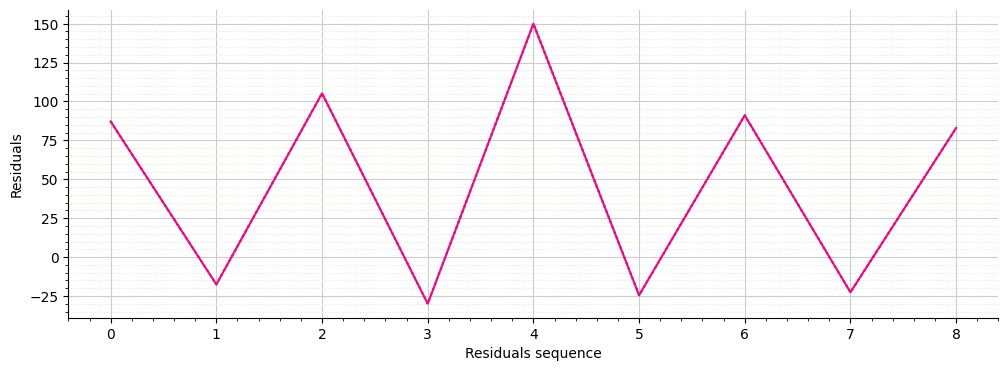

In [8]:
cycle_count_s.plot_residuals_sequence(label='Cycle Count Signal')

Now that we have seen the application of `CycleCount` method on a rather simple signal, we will now implement it on a much longer signal to get some reasonable values of damage. Let's simulate a signal of 12 hours duration and apply `CycleCount` method on it following the same methodology as before

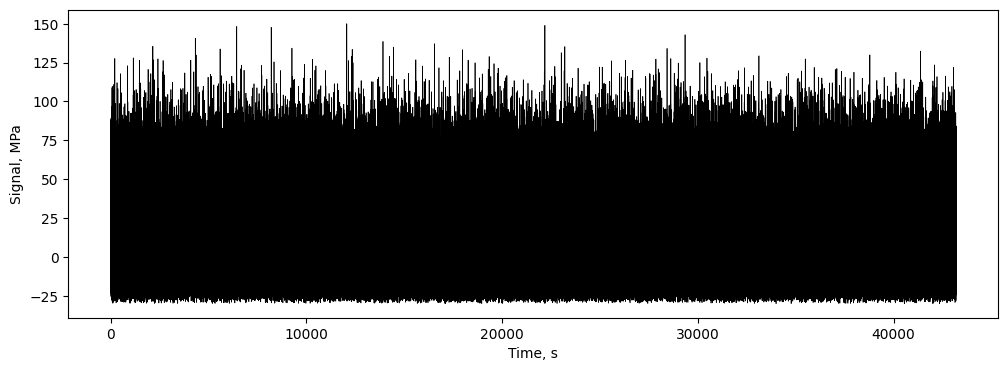

In [9]:
import py_fatigue as pf
import py_fatigue.testing as test
import matplotlib.pyplot as plt

# Simulate a random signal for (43200 seconds/720 minutes/ 12 hours)
t = test.get_sampled_time(duration=43200, fs=10)
s = test.get_random_data(
    t=t, min_=-30, range_=180, random_type="weibull", a=2, seed=42
)
# Plot the signal
plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.plot(t, s, 'k', lw=0.5)
plt.xlabel("Time, s")
plt.ylabel("Signal, MPa")
plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.show()

In [10]:
# CycleCount definition
cycle_count = pf.CycleCount.from_timeseries(
    time=t, data=s, mean_bin_width=3, range_bin_width=3,
)
cycle_count

,None
Cycle counting object,
"largest full stress range, MPa",178.920242
"largest stress range, MPa",180.0
number of full cycles,144107
number of residuals,29
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


The histograms of the `cycle_count` instances can be plotted both using the reconstructed cycle count from the exported dictionary as well as from the cycle count matrix from the original signal. This will show that the information in the cycle count is retained and reconstructed.

In [11]:
# Exporting the cycle-count matrix
exp_dict = cycle_count.as_dict(
    max_consecutive_zeros=20, damage_tolerance_for_binning=1
)

# Reconstructing the CycleCount instance from the exported matrix
cycle_count_d = pf.CycleCount.from_rainflow(exp_dict, name="Random Signal")

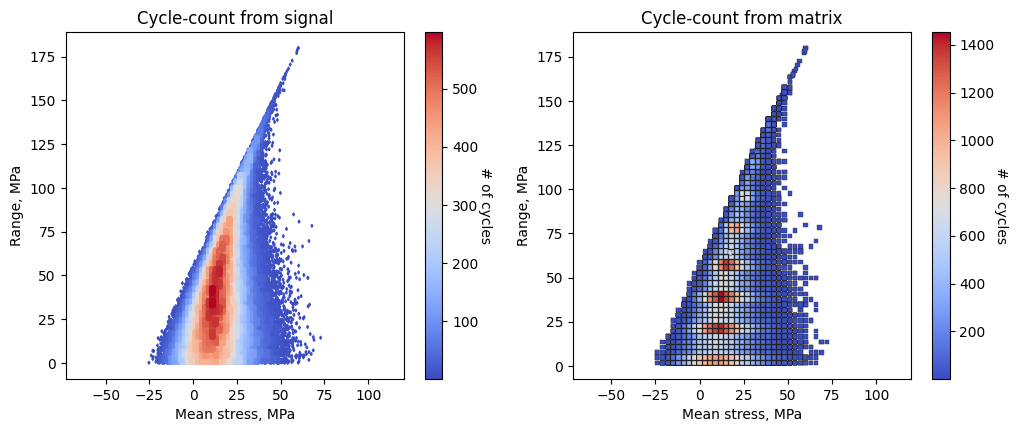

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))
cycle_count.plot_histogram(fig=fig, ax=axs[0], plot_type="mean-range",
                           marker="d", s=2, cmap=mpl.cm.get_cmap("coolwarm"))
axs[0].set_title("Cycle-count from signal")
cycle_count_d.plot_histogram(fig=fig, ax=axs[1], plot_type="mean-range",
                             marker="s", s=10, edgecolors="#222",
                             cmap=mpl.cm.get_cmap("coolwarm"), linewidth=0.25)
axs[1].set_title("Cycle-count from matrix")
plt.show()

## Fatigue specific Material Properties
After processing the signals using `CycleCount` method, we need to define fatigue specific material properties. For linear fatigue damage accumulation, Palmgren-Miner rule is the most commonly applied method. This method requires definition of Stress range versus number of cycles to failure commonly known as SN-Curve. `py_fatigue` proposes a very simple method to define linear and bilinear SN-curves using slope and intercept values. Multiple SN-curves are defined for air and water as extracted from *DNVGL-RP-C203/2020*.

The S-N Curves are defined from DNVGL-RP-C203/2020. The snippets of the tables for SN curves in air, seawater with free corrosion and seawater with cathodic protection are shown below:

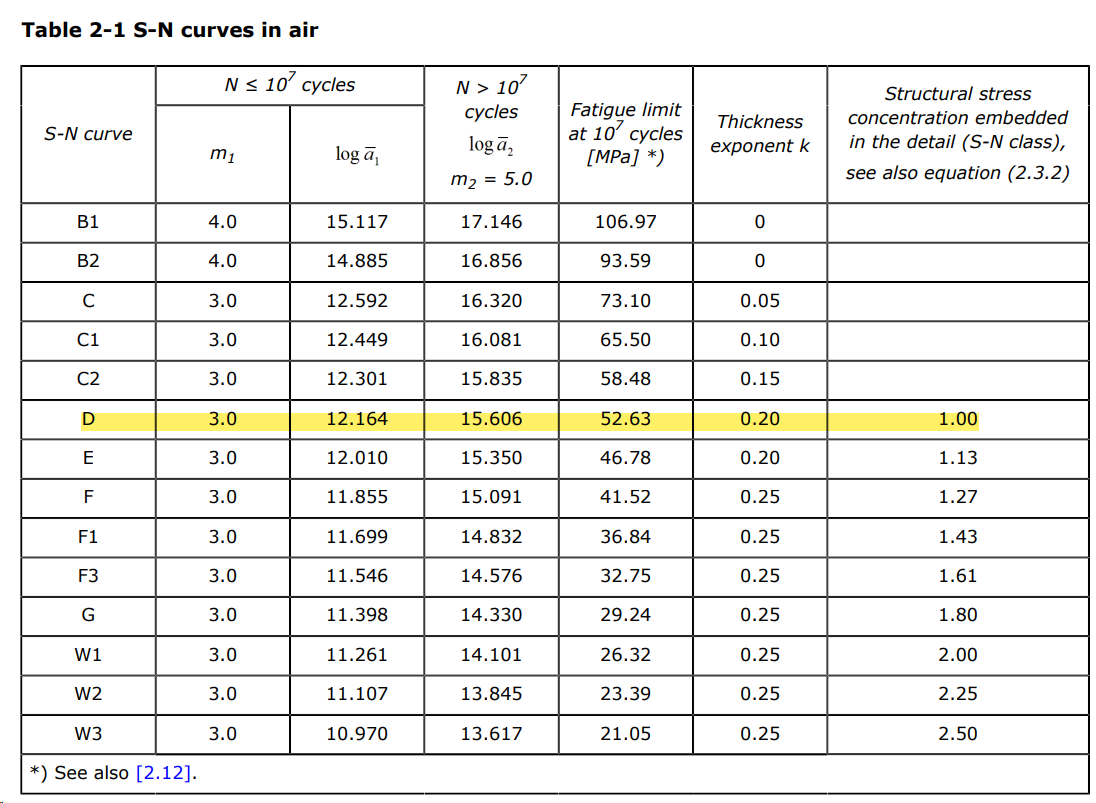
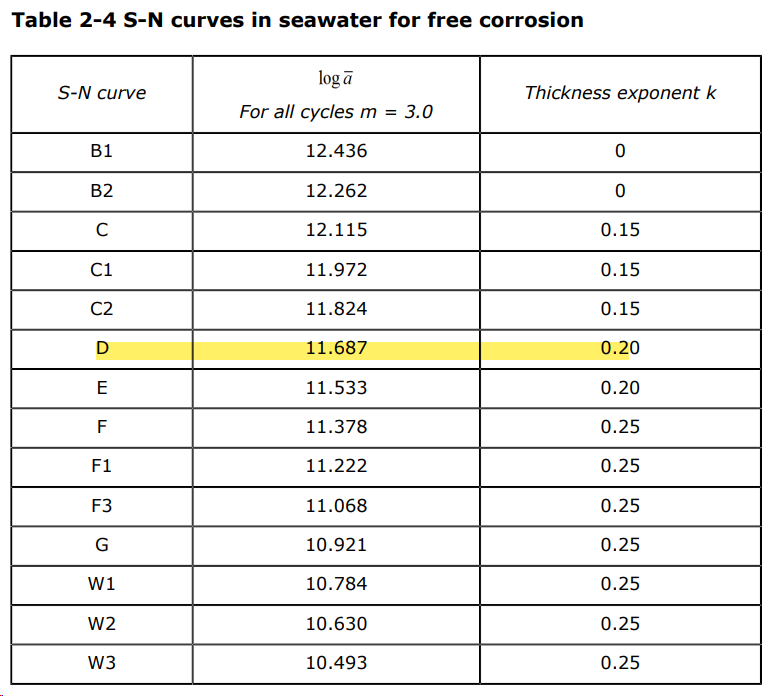
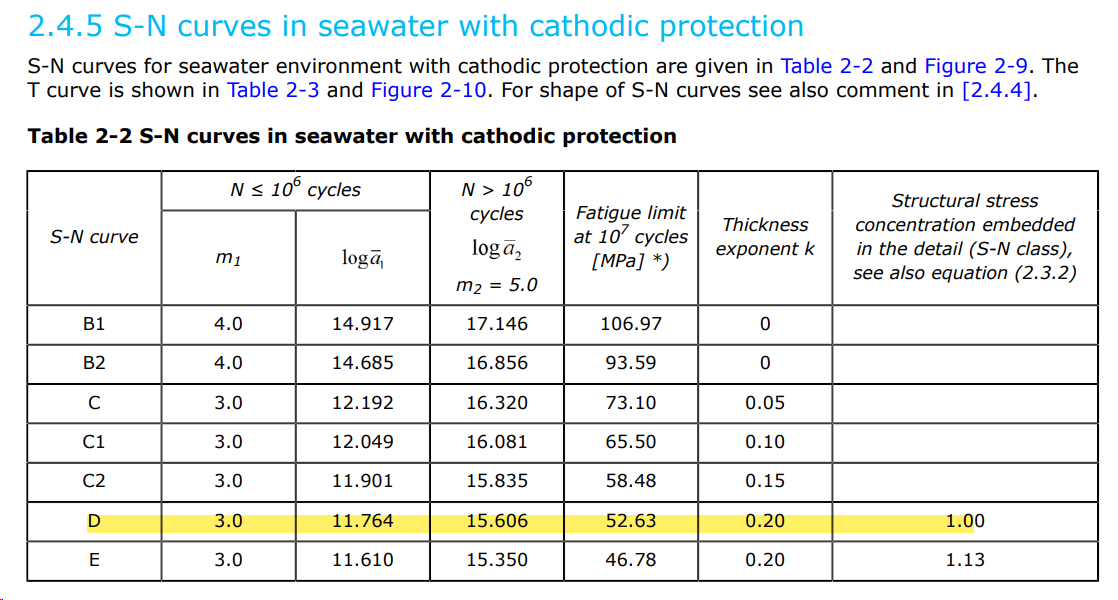

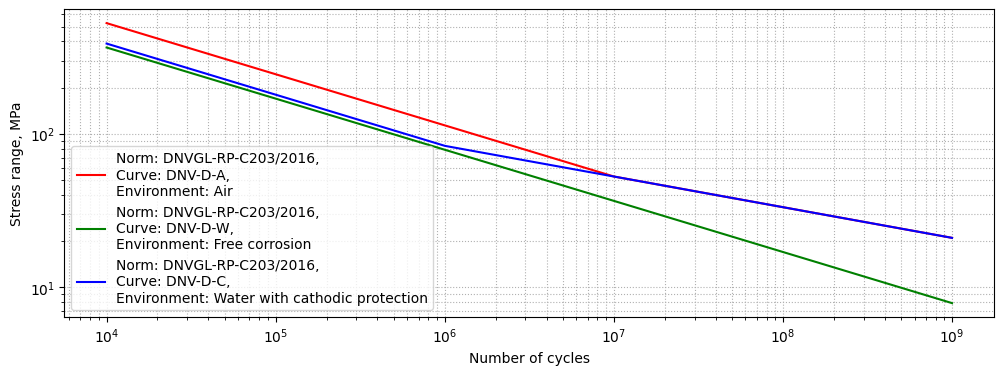

In [13]:
sn1 = pf.SNCurve(
    slope=[3, 5], 
    intercept=[12.164, 15.606],
    #N_knee=1e7,
    environment = 'Air', 
    curve = 'DNV-D-A',
    norm = 'DNVGL-RP-C203/2016',
    color='r'
)

sn2 = pf.SNCurve(
    slope=[3], 
    intercept=[11.687], 
    environment = 'Free corrosion', 
    curve = 'DNV-D-W', 
    norm = 'DNVGL-RP-C203/2016',
    color='g'
)

sn3 = pf.SNCurve(
    slope=[3, 5], 
    intercept=[11.764, 15.606], 
    #N_knee=1e6, 
    environment = 'Water with cathodic protection', 
    curve = 'DNV-D-C', 
    norm = 'DNVGL-RP-C203/2016',
    color='b'
)

fig, ax = sn1.plot()
sn2.plot(fig=fig, ax=ax)
sn3.plot(fig=fig, ax=ax)
plt.legend()


The simplest way to plot an SN curve object of `py_fatigue` is by calling it directly as shown below.

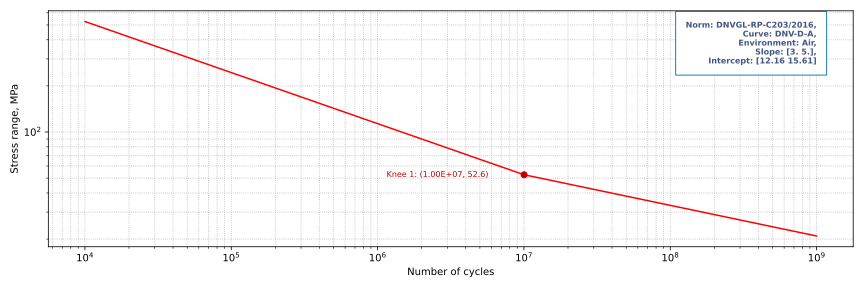

In [14]:
sn1

Endurance limit can also be defined in `pf.SNCurve` using endurance.

In [15]:
sne = pf.SNCurve(
    slope=[3, 5], 
    intercept=[11.764, 15.606], 
    endurance = 100000000,
    environment = 'Free corrosion', 
    curve = 'DNV-D-W', 
    norm = 'DNVGL-RP-C203/2016',
    color='g'
)

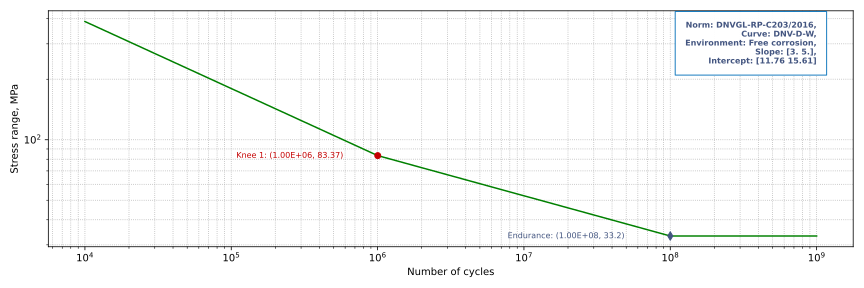

In [16]:
sne

The slope and intercept of any defined sn curve can be extracted using `sn.slope` and `sn.intercept` respectively.

In [17]:
print (f'sn1.slope: {sn1.slope}, sn1.intercept: {sn1.intercept}')
print (f'sn2.slope: {sn2.slope}, sn2.intercept: {sn2.intercept}')
print (f'sn1..get_knee_cycles(): {sn1.get_knee_cycles()}, sn1.get_knee_stress(): {sn1.get_knee_stress()}')

print(sn1.get_cycles(52.6))
print(sn1.get_stress(10024697.5))

sn1.slope: [3. 5.], sn1.intercept: [12.164 15.606]
sn2.slope: [3.], sn2.intercept: [11.687]
sn1..get_knee_cycles(): [10023052.38077899], sn1.get_knee_stress(): [52.60172664]
[10024697.56424529]
[52.60000007]


## Damage Calculation Using Palmgren-Miners Rule
Applying Palmgren-Miners Rule on the cycle_count to get the damage values. This method `damage=pf.damage.get_pm(cycle_count=cycle_count, sn_curve=sn1)` gives an numpy array saved in damage. Each value of this array is the damage contributed by each full cycle in the `cycle_count`. To get a cumulative damage of all the cycles in `cycle_count`, the `sum(damage)` is used.

In [18]:
# Calculate damage for the cycle-count objects
damage = pf.damage.get_pm(cycle_count=cycle_count, sn_curve=sn1)
print(type(damage))
print (damage[1:10])
print(f"Cumulative Damage: {sum(damage)}")

<class 'numpy.ndarray'>
[1.56733592e-16 9.09037126e-08 1.46606063e-07 1.93993545e-08
 2.39048038e-09 2.34884162e-10 9.59339013e-09 9.24470227e-08
 1.35383905e-15]
Cumulative Damage: 0.016316300295702788


Accumulated damage using PM-Rule could also be calculated using Pandas dataframes. The `cycle_count` objects as converted to pandas dataframe are saved as df. `df.miner.damage()` method calculates the damage of cycle counts saved in df dataframe using miners rule.

In [19]:
import pandas as pd

df = cycle_count.to_df()

# Stress-life
damage_pd = df.miner.damage(sn_curve=sn1)
#df.miner.plot_histogram()
print(f"Cumulative Damage: {damage_pd['pm_damage'].sum()}")
damage_pd.head()

Cumulative Damage: 0.01631630029570261


,count_cycle,mean_stress,stress_range,cycles_to_failure,pm_damage
0,1.0,48.456213,0.808253,1.170208e+16,8.545487e-17
1,1.0,31.070227,0.912499,6.380253e+15,1.567336e-16
2,0.5,17.056840,64.249616,5.500325e+06,9.090371e-08
3,0.5,22.605070,75.346077,3.410500e+06,1.466061e-07
4,1.0,3.252640,37.910320,5.154811e+07,1.939935e-08


## *Long term monitoring data processing using py_fatigue*
The monitoring data from any asset cannot be saved and imported for indefinite period of time. For example, if I want to check the accumulated damage in a structure after one month of operation, it is impractical to import a timeseries signal of whole life. For this purpose, the monitoring data is usually saved in 10-minute intervals. A more efficient way is to save to the 10-min intervals data in a cycle-count objects. This is usually done for offshore wind monitoring data.


In [20]:
import datetime
import numpy as np

start_time = pd.Timestamp('2024-03-21 00:00:00')
DF = pd.DataFrame(columns=['Time', 'CC_Stress'])

for i in range (600,int(np.ceil(max(t)))+1,600):
    mask = ((t<=i) & (t>i-600))
    interval = t[mask]
    interval_data = s[mask]
    cycle_c = pf.CycleCount.from_timeseries(
    time=interval, data=interval_data, mean_bin_width=3., range_bin_width=3,name='Stress [MPa]'
    )
    
    timestamp = start_time + datetime.timedelta(seconds=i)
    
    # Append values to the DataFrame
    new_row = pd.DataFrame({'Time': [timestamp], 'CC_Stress': [cycle_c]})
    DF = pd.concat([DF, new_row], ignore_index=True)

DF.set_index('Time', inplace=True)

DF.head()

,CC_Stress
Time,
2024-03-21 00:10:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -"
2024-03-21 00:20:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -"
2024-03-21 00:30:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -"
2024-03-21 00:40:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -"
2024-03-21 00:50:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -"


`DF` dataframe shows a typical example of saving, exporting and quering monitoring data for offshore wind turbines. The datetime index stores the information of time, each with 10 minute intervals while the CC_Stress column stores the cycle counting objects of 10-minute interval signals. The `cycle_count` object for the first 10-minute interval could be visualized using `DF['CC_Stress'][0]`

In [21]:
DF['CC_Stress'][0]

,Stress [MPa]
Cycle counting object,
"largest full stress range, MPa",140.873748
"largest stress range, MPa",157.317537
number of full cycles,2001
number of residuals,22
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


### *Damage Calculation using 10 minute interval signal*
The `CC_Stress` column contains the `cycle_count` objects of each interval. The damage calculation on each cc object is `sum(pf.damage.get_pm())`. The additional column *Stress Damage* stores the damage for each 10 minute interval.

In [22]:

for col in DF.columns:
    if col[:2]=='CC':
        #dwf[col]=dwf[col]
        colname = col[3:]+' Damage'
        DF[colname] = float('NaN')
        DF[colname] = DF.apply(lambda x: sum(pf.damage.get_pm(cycle_count=x[col], sn_curve=sn1)), axis=1).tolist()

DF.head()

,CC_Stress,Stress Damage
Time,,
2024-03-21 00:10:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -",0.000226
2024-03-21 00:20:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -",0.000225
2024-03-21 00:30:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -",0.000233
2024-03-21 00:40:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -",0.000235
2024-03-21 00:50:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -",0.000233


The accumulated damage for 12 hours of the loading history is calculated by summing the individual 10 minute interval damages.

In [23]:
print(f"Cumulative Damage from 10 minute intervals: {DF['Stress Damage'].sum()}")

Cumulative Damage from 10 minute intervals: 0.016305939438654958


### Low Frequency Fatigue Dynamics (Effect of Resolving Residuals)
So far, we have not accounted for residuals in the 10 minute intervals. Thus, we should expect some error in the damage calculated using 10 minute intervals and the damage calculated using the complete signal. The error is calculated below.

In [24]:
Error_ = (sum(damage)-(DF['Stress Damage'].sum()))/sum(damage)*100
print(f"Percentage Deviation of Cumulative Damage using 10 minute intervals: {Error_}")

Percentage Deviation of Cumulative Damage using 10 minute intervals: 0.06350003897978145


At first, this value seems negligible but if we assume a linear accumulation of error in the accumulated damage on 10 minute intervals, then the errors for one month interval could be approximated as given below. This error arises due to residual signals.

In [25]:
(Error_*2*30)

np.float64(3.810002338786887)

This phenomenon is defined as low frequency fatigue dynamics (LFFD) occuring due to the residuals in the signals which do not form a closed hysteresis loop as they do not have enough time to complete in 10 minute intervals. `py_fatigue` offers a `resolve_residuals()` method to account for these residuals that are left in the 10 minute interval signals.

The residuals from `cycle_count` objects of 10 min intervals are added (concatenated residual sequence) and then rainflow counting is applied on concatenated residual sequence to account for the LFFD. In `py_fatigue` this is simply done by summing up the 10 min cycle counted objects and applying `cc.resolve_residuals()` method as shown below.

In [26]:
#Resolved residuals in cycle counted objects
NR_CC = DF['CC_Stress'].sum()
RR_CC = NR_CC.resolve_residuals()

RR_CC

,Stress [MPa]
Cycle counting object,
"largest full stress range, MPa",178.920242
"largest stress range, MPa",180.0
number of full cycles,144106
number of residuals,30
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,No


<Figure size 2000x600 with 0 Axes>

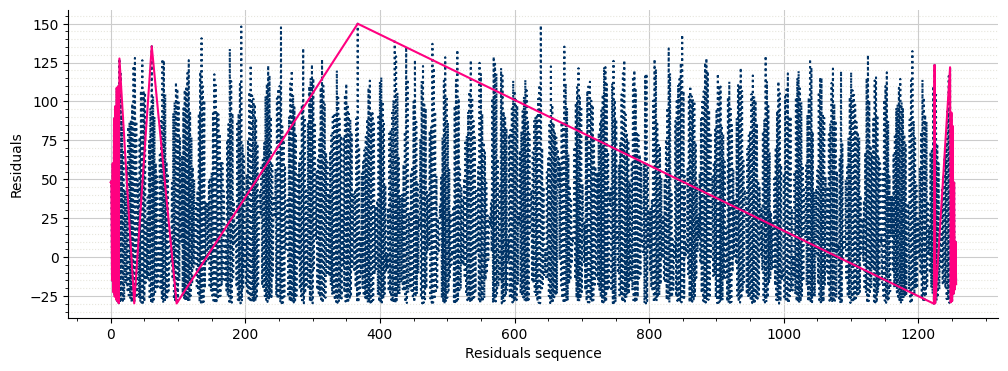

In [27]:
plt.figure(figsize=(20, 6))
NR_CC.plot_residuals_sequence(label='Cycle Count Signal')
plt.show()

It can be noted that the cycle_count on original signal is very similiar to the one obtained from 10 minute intervals with residuals resolved. We should expect minimal error in accumulated damage calculated from 10 minute intervals with residuals resolved

In [28]:
cycle_count

,None
Cycle counting object,
"largest full stress range, MPa",178.920242
"largest stress range, MPa",180.0
number of full cycles,144107
number of residuals,29
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


In [29]:
# Calculate damage for the cycle-count objects
damage_RR = pf.damage.get_pm(cycle_count=RR_CC, sn_curve=sn1)
print(type(damage_RR))
print(f"Cumulative Damage with residuals resolved : {sum(damage_RR)}")

<class 'numpy.ndarray'>
Cumulative Damage with residuals resolved : 0.01631629893869964


In [30]:
Error_RR = (sum(damage)-sum(damage_RR))/sum(damage)*100
print(f"Percentage Deviation of Cumulative Damage using 10 minute intervals with residuals resolved: {Error_RR}")

Percentage Deviation of Cumulative Damage using 10 minute intervals with residuals resolved: 8.31685568508474e-06


The percentage deviation in cumulative damage using 10 minute intervals with residuals resolved gives negligible errors thus proving the effectiveness of `cc.resolve_residuals()` method of `py_fatigue`

Damage Equivalent Stress Range (DES) is a single digit representation of the loading signal. The real-life loading signals could be of variable amplitudes and difficult to interpret. DES provides a constant stress range value corresponding to equivalent cycles to failure for a single slope SN-Curve. It is usually used to compare various loading conditions.

In `py_fatigue` it can also be calculated for a `cycle_count` object using `py_fatigue.damage.stress_life.get_des(cycle_count, slope, equivalent_cycles = 10000000.0)`

In [31]:
pf.damage.stress_life.get_des(RR_CC, 3)

np.float64(13.566132463844365)

In [32]:
pf.damage.stress_life.get_des(NR_CC, 3)

np.float64(13.563393542661942)

While, Damage Equivalent Stress Range (DES) is a representation of the loading signal, Damage Equivalent Moment (DEM) represents the equivalent moment that would fail the structure at equivalent number of cycles. It is calculated in (Nm) as:
`py_fatigue.damage.stress_life.get_dem(outer_radius, inner_radius, cycle_count, slope, equivalent_cycles = 10000000.0)`

In [33]:
pf.damage.stress_life.get_dem(1.5, 1.2, RR_CC, 3)

np.float64(21230785.408160556)

In [34]:
pf.damage.stress_life.get_dem(1.5, 1.2, NR_CC, 3)

np.float64(21226499.039290953)

### Stress Transformation and Stress Concentration Factor
Till now, we have not considered any stress concentration factor in the cycle counting objects. These factors are important for **Stress Transformation to other locations**, **Incorporatethe effect of geometrical irregularities** and **include the effect of welds in the structure**

Consider a cantilever beam with varying cross-section and a point load applied at the tip as shown in Figure 2. The bending moment diagram in the cantilever beam is also shown.

Imagine that the signal we have been simulating so far was an actual stress signal measured at Section A-A of the given beam. We now have the accumulated damage at Section A-A. From the bending moment diagram we notice that Section A-A is not the most critical location in the beam. At Section B-B, the bending moment is higher and there is a circumferential weld at that section as well. 

The stress signal needs to be transformed to Section B-B for calculation of the accumulated damage at Section B-B. Suppose from design, we know the bending moment diagram for the beam subjected to operation load **F** at the tip. The bending moment ratio at section A-A and section B-B is calculated as the load extrapolation factor shown in `Figure 2`. Similarly, the cross-sectional details at section A-A and section B-B are not the same. Thus, a stress extrapolation factor incorporating the effect of varying radius and second moment of area of the sections is calculated as shown in `Figure 2`. The circumferential weld at section B-B introduces a geometric irregularity and thus is accounted for a stress concentration factor. Finally a materials safety factor as per design is also included in the calculations.

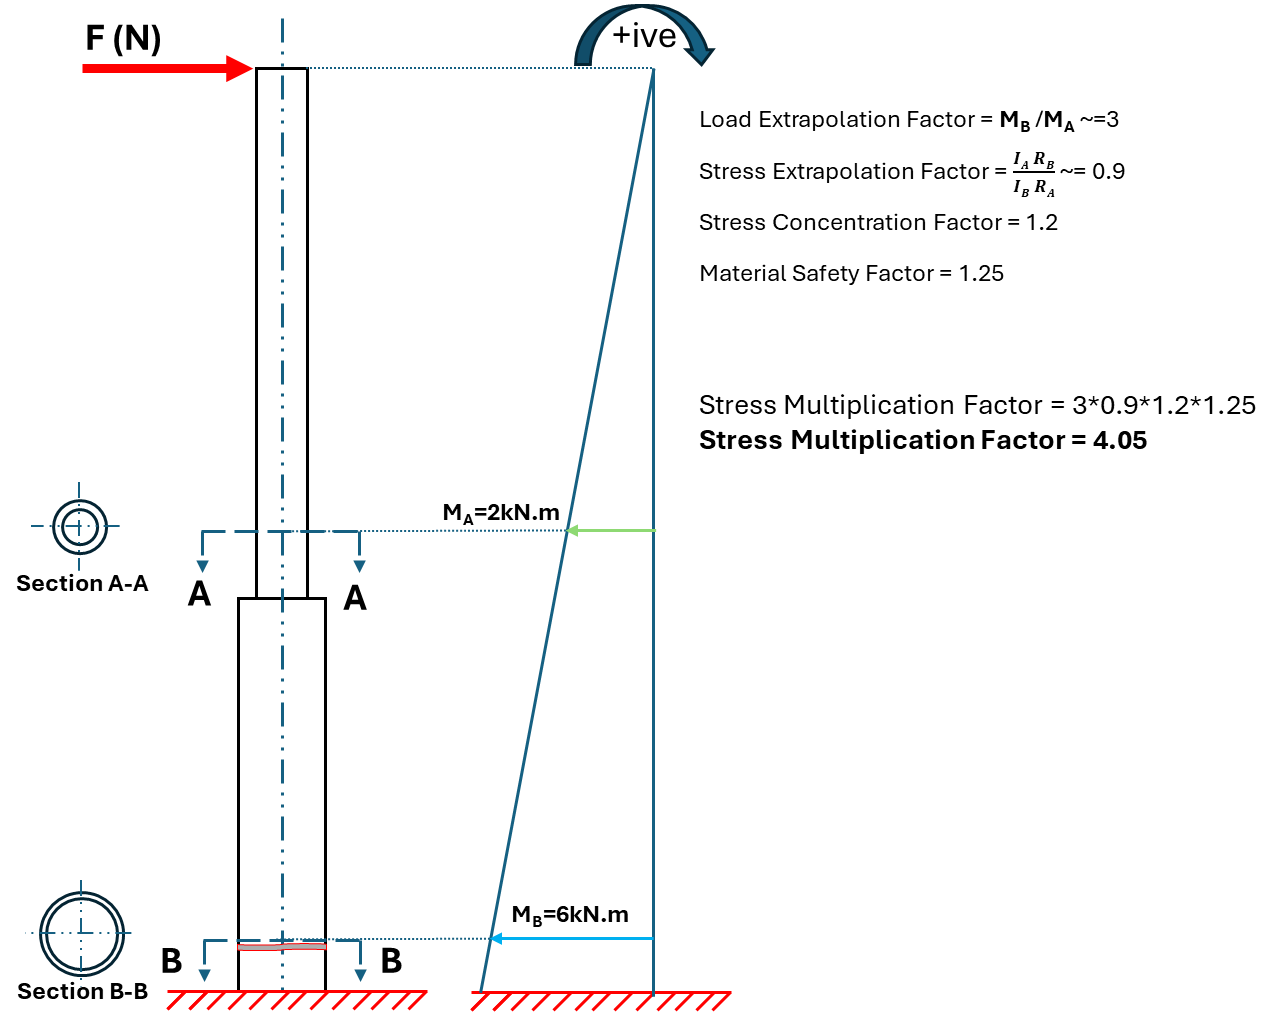

<div align="center"><em>Figure 2: Stress Concentration Factor</em></div>

All these factors are accumulated in a single **Stress Multiplication Factor** which is used for scaling the `cycle_count` objects and thus for accumulated damage calculation at Section B-B.

In [35]:
SMF = 4.05 #Stress Multiplication Factor
DF['CC_Stress'][0]*SMF

,"Stress [MPa], SCF=4.05"
Cycle counting object,
"largest full stress range, MPa",570.53868
"largest stress range, MPa",637.136026
number of full cycles,2001
number of residuals,22
number of small cycles,0
stress concentration factor,4.05
residuals resolved,False
mean stress-corrected,No


In [36]:
for col in DF.columns:
    if col[:2]=='CC':
        #dwf[col]=dwf[col]
        colname = col[3:]+' Damage Section B-B'
        DF[colname] = float('NaN')
        DF[colname] = DF.apply(lambda x: sum(pf.damage.get_pm(cycle_count=(SMF*x[col]), sn_curve=sn1)), axis=1).tolist()

DF.head()

,CC_Stress,Stress Damage,Stress Damage Section B-B
Time,,,
2024-03-21 00:10:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -",0.000226,0.015743
2024-03-21 00:20:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -",0.000225,0.015714
2024-03-21 00:30:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -",0.000233,0.016188
2024-03-21 00:40:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -",0.000235,0.016339
2024-03-21 00:50:00,"CC_Stress [MPa] (20 Mar 2025, 14:58 -",0.000233,0.016181


In [37]:
print(f"Cumulative Damage from 10 minute intervals at Section B-B: {DF['Stress Damage Section B-B'].sum()}")

Cumulative Damage from 10 minute intervals at Section B-B: 1.1360133924131666


Although, the structure was safe as per damage accumulated at section A-A, the accumulated damage at section B-B shows the structure would fail. The identification of stress critical sections and their respective scaling factors in such applications is very crucial to predict the lifetime of the structure

## Mean Stress Corrections
The concept of mean stress effect refers to the influence of the average stress level on the fatigue life of a material. This effect becomes significant when the material experiences cyclic loading with a non-zero mean stress component.

The the presence of mean stress can affect the fatigue behavior of a material. Mean stress can either accelerate or retard fatigue crack initiation and propagation, depending on various factors such as material properties, loading conditions, and environmental factors.

[**DNVGL-RP-C203 correction**](https://owi-lab.github.io/py_fatigue/api/stress/mean_stress.html) calculates the mean stress correction according to par. 2.5 of DNVGL-RP-C203 which includes an attenuation factor `p`  for the stress range of following cases:
* base material without significant residual stresses (use `p=0.6`)  This option neglects fully compressive cycles
* Welded connections without significant residual stresses (use `p=0.8`)  This option multiplies the stress range of fully compressive cycles by p.


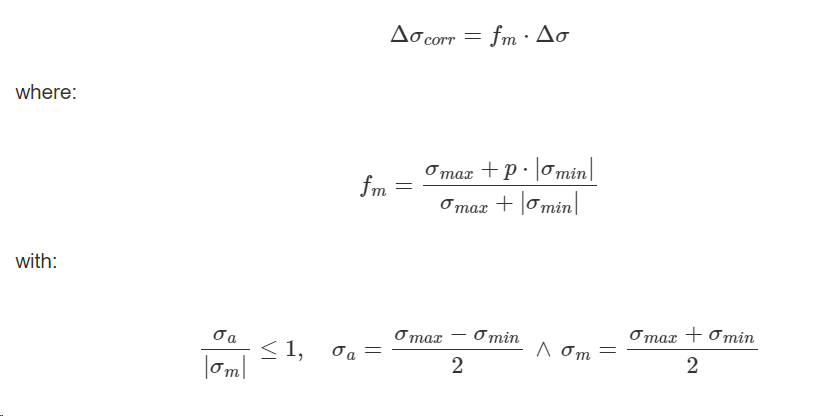

The corrected stress range is obtained by multiplying the original stress range with the `reduction factor (f_m)` as per DNVGL-RP-C203 Section 2.5. Sigma_max and Sigma_min are the maximum and minimum stresses in any cycle considered.

,None
Cycle counting object,
"largest full stress range, MPa",166.928983
"largest stress range, MPa",168.0
number of full cycles,144107
number of residuals,29
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,DNVGL-RP-C203: {'detail_factor': 0.6}


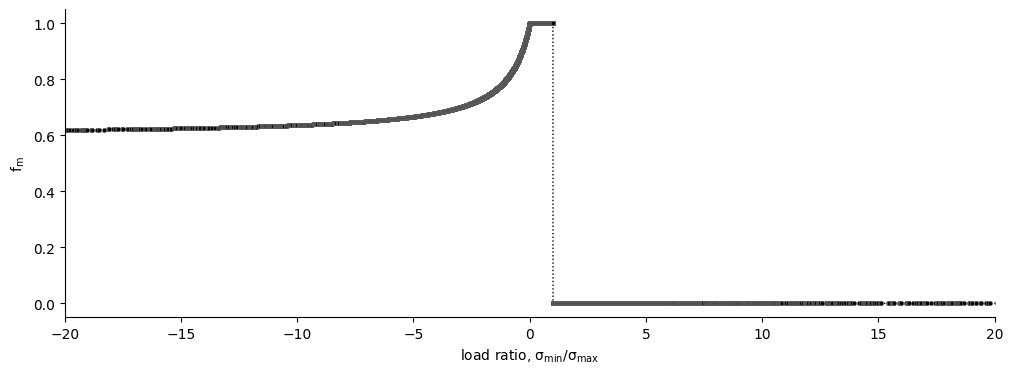

In [38]:
cc_corr_6 = cycle_count.mean_stress_correction(
  correction_type = "DNVGL-RP-C203",
  plot = True,
  detail_factor=0.6,
)
cc_corr_6

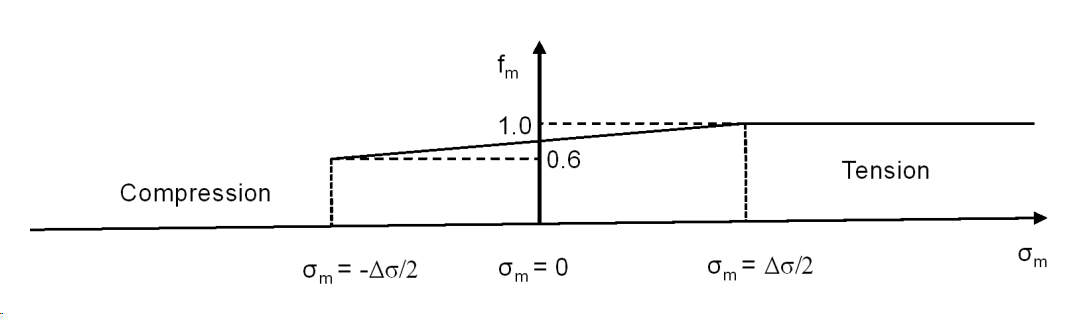
<div align="center"><em>Stress range reduction factor to be used with the S­N curve for base material [DNVGL-­RP-­C203]</em></div>

,None
Cycle counting object,
"largest full stress range, MPa",172.924612
"largest stress range, MPa",174.0
number of full cycles,144107
number of residuals,29
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,DNVGL-RP-C203: {'detail_factor': 0.8}


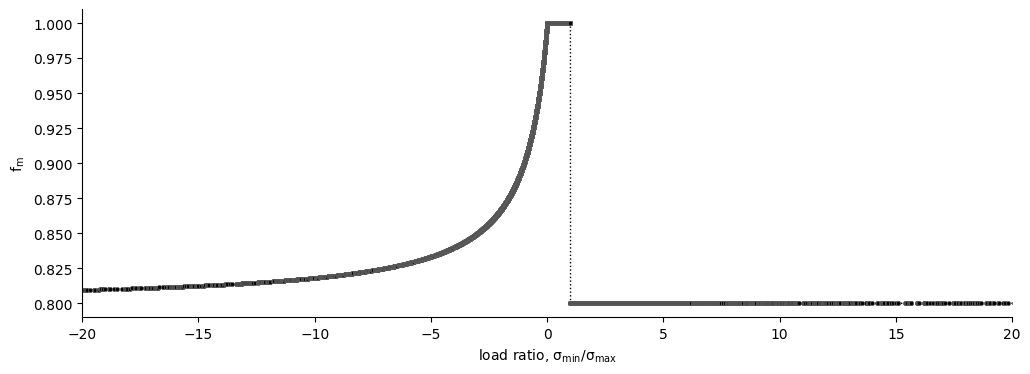

In [39]:
cc_corr_8 = cycle_count.mean_stress_correction(
  correction_type = "DNVGL-RP-C203",
  plot = True,
  detail_factor=0.8,
)
cc_corr_8

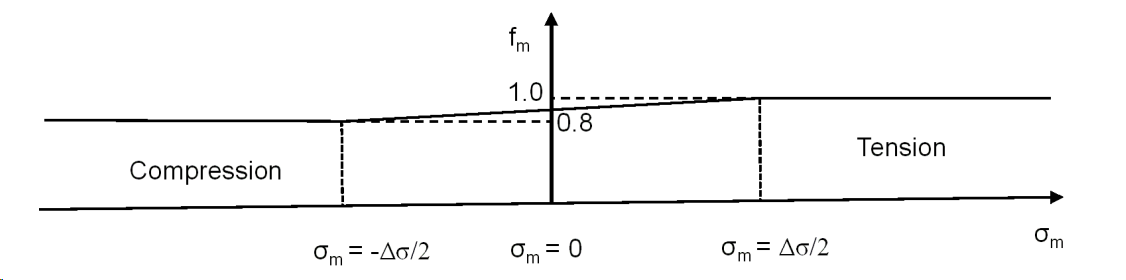
<div align="center"><em>Stress range reduction factor at post weld heat treated connections or welds with corresponding low residual stresses [DNVGL-­RP-­C203]</em></div>

[**Walker Correction**](https://owi-lab.github.io/py_fatigue/user/examples/06-mean_stress.html) calcualtes the corrected stress range as follows

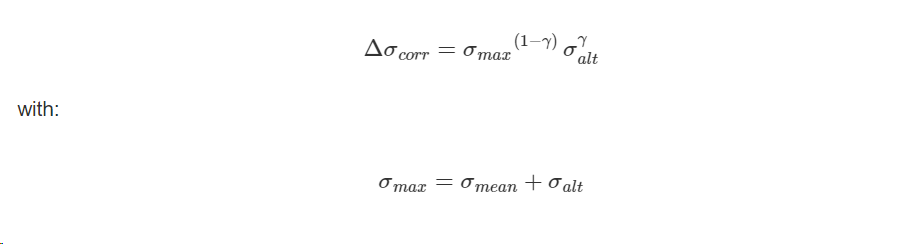

`Note that sigma_alt is the stress amplitude.`

`γ` is the stress [Walker parameter](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5744336/), which is an empirical parameter varying from [0,1] representing maxiumum and minimum sensitivity to the load ratio

,None
Cycle counting object,
"largest full stress range, MPa",109.694454
"largest stress range, MPa",110.403288
number of full cycles,144107
number of residuals,29
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,WALKER: {'gamma': 0.6}


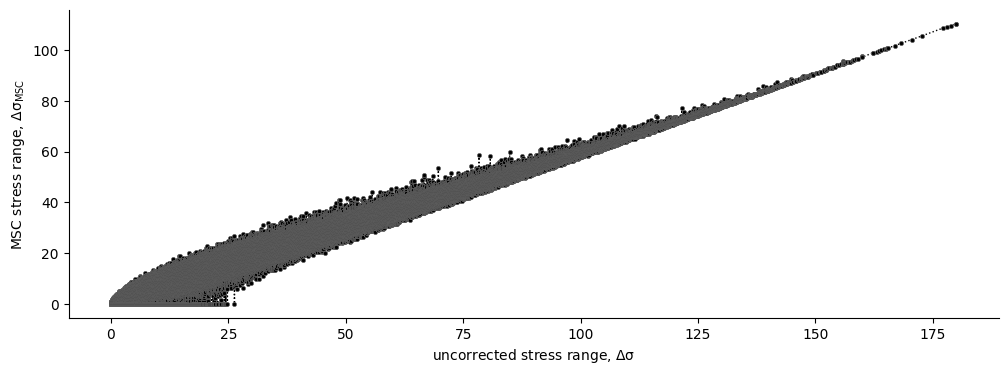

In [40]:
cc_corr_walk = cycle_count.mean_stress_correction(
  correction_type = "walker",
  plot = True,
  gamma=0.6,
)
cc_corr_walk

[**Smith-Watson-Topper**](https://owi-lab.github.io/py_fatigue/user/examples/06-mean_stress.html) is special case of Walker Correction with `gamma=0.5`

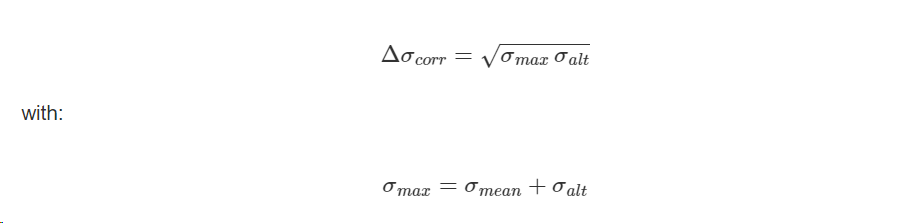

## **Crack Growth Using Paris' Law**
The Paris law of fracture mechanics is a crack growth equation that gives the rate of growth of a fatigue crack. The tracking of crack growht with load cycles involves defning the Paris curve that correlates the Stress Intensity Factor Range (SIF) with the crack growth rate (da/dN) with number of stress cyles.

### Paris Curve Definition 
The [paris curve](https://owi-lab.github.io/py_fatigue/user/examples/03-cg_curve.html) defines the stable crack propagation region (Phase II) as shown below. The simplest representation of the Paris law is a linear curve between threshold and critical SIF range. But, depending upon the material, paris law is rather defined as a combinatino of linear segments in stable propagation region.

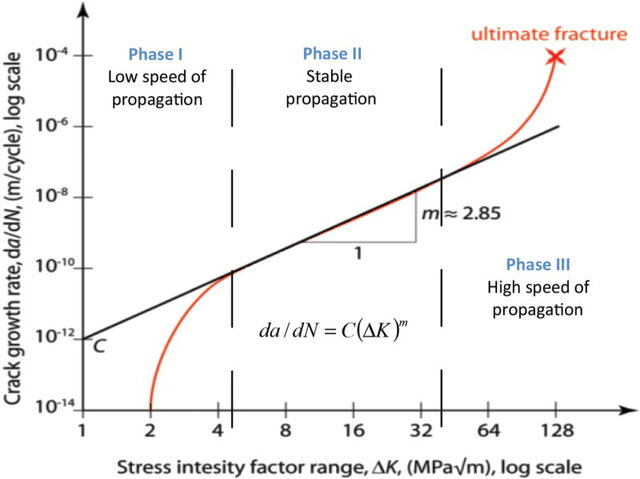

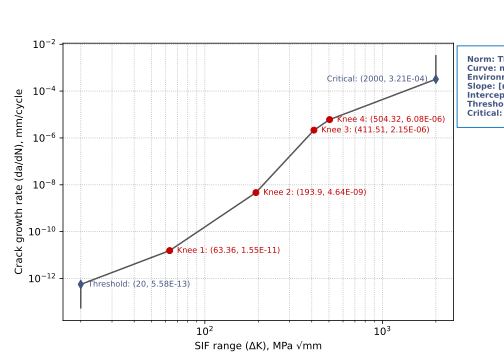

In [41]:
SIF = np.linspace(1,2500, 300)
SLOPE = np.array([2.88, 5.1, 8.16, 5.1, 2.88])
INTER = np.array([1E-16, 1E-20, 1E-27, 1E-19, 1E-13])
THRESHOLD = 20
CRITICAL = 2000
pc = pf.ParisCurve(slope=SLOPE, intercept=INTER, threshold=THRESHOLD,
                   critical=CRITICAL, norm="The norm",
                   environment="Environment", curve="nr.")
pc

### Crack Geometry Definition 
The application of the fracture mechanics starts witht the presence of a crack. The propagation of the crack is studied using Paris curve. Thus, the [geometry](https://owi-lab.github.io/py_fatigue/api/geometry/cylinder.html) of the initial crack needs to be defined which will be used along with the paris curve and loading history to estimate the [evolution of the crack with time](https://owi-lab.github.io/py_fatigue/api/damage/crack_growth.html).

HollowCylinder(
  _id=HOL_CYL_01,
  initial_depth=3.0,
  outer_diameter=50.0,
  thickness=8.0,
  height=100.0,
  width_to_depth_ratio=2.0,
  crack_position=external,
)

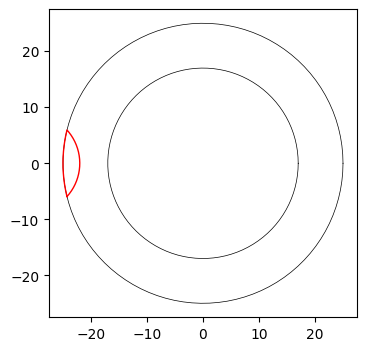

In [42]:
geo = pf.geometry.HollowCylinder(
  initial_depth=3,
  thickness=8.,
  height=100.,
  outer_diameter=50.,
  crack_position="external"
)
geo.plot()
geo

In [43]:
cg_d = pf.damage.crack_growth.get_crack_growth(
  cycle_count_d, pc, geo, express_mode=True
)
print(f"Cycles to end: {int(cg_d.final_cycles)}")

Fatigue spectrum applied w/o failure. Stopping calculation
Cycles to end: 143689


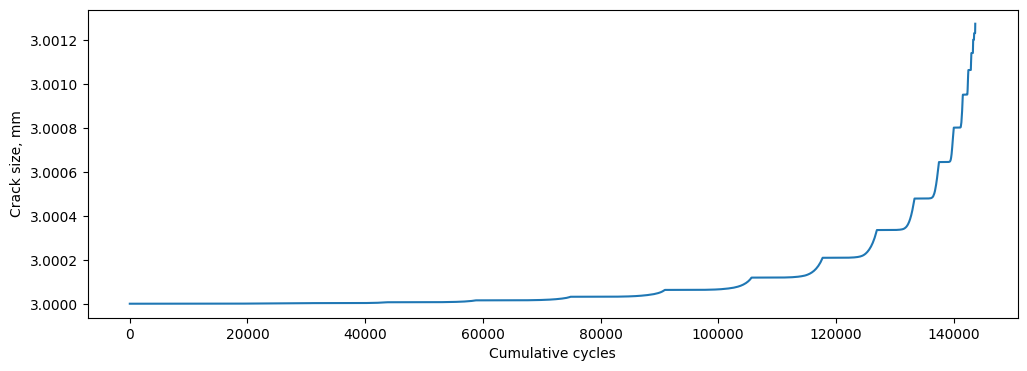

In [44]:
plt.plot(np.cumsum(cg_d.count_cycle), cg_d.crack_depth)
plt.xlabel("Cumulative cycles")
plt.ylabel("Crack size, mm")
plt.show()

The PM-damage and crack growth could also be calculated using pandas dataframe form of cycle counted objects as shown below:

In [45]:
df = cycle_count_d.to_df()

# Stress-life
df.miner.damage(sn_curve=sn1)
# Crack-growth
df.cg.calc_growth(cg_curve=pc, crack_geometry=geo)

Fatigue spectrum applied w/o failure. Stopping calculation


,count_cycle,mean_stress,stress_range,cycles_to_failure,pm_damage,crack_depth,sif,cumul_cycle,geometry_factor
0,1.0,-24.0000,1.7000,2.842859e+14,3.517585e-15,3.000000,4.411542,1.0,0.845290
1,2.0,-24.0000,4.7000,1.759992e+12,1.136369e-12,6.000000,24.393235,5.0,1.690581
2,2.0,-24.0000,7.7000,1.491236e+11,1.341169e-11,6.000000,39.963385,9.0,1.690581
3,9.0,-21.0000,1.7000,2.842859e+14,3.165827e-14,27.000000,39.703882,90.0,7.607614
4,4.0,-21.0000,4.7000,1.759992e+12,2.272738e-12,12.000000,48.786469,66.0,3.381162
...,...,...,...,...,...,...,...,...,...
826,0.5,30.3070,107.9155,1.160776e+06,4.307462e-07,0.000000,0.000000,0.0,0.000000
827,0.5,12.1008,71.5033,3.990449e+06,1.252992e-07,3.001265,408.557334,143681.5,0.845328
828,0.5,13.4861,68.7328,4.492705e+06,1.112915e-07,0.000000,0.000000,0.0,0.000000
829,0.5,-5.4885,30.7835,1.460192e+08,3.424207e-09,3.001266,429.006768,143682.0,0.845328


In [46]:
df

,count_cycle,mean_stress,stress_range,cycles_to_failure,pm_damage,crack_depth,sif,cumul_cycle,geometry_factor
0,1.0,-24.0000,1.7000,2.842859e+14,3.517585e-15,3.000000,4.411542,1.0,0.845290
1,2.0,-24.0000,4.7000,1.759992e+12,1.136369e-12,6.000000,24.393235,5.0,1.690581
2,2.0,-24.0000,7.7000,1.491236e+11,1.341169e-11,6.000000,39.963385,9.0,1.690581
3,9.0,-21.0000,1.7000,2.842859e+14,3.165827e-14,27.000000,39.703882,90.0,7.607614
4,4.0,-21.0000,4.7000,1.759992e+12,2.272738e-12,12.000000,48.786469,66.0,3.381162
...,...,...,...,...,...,...,...,...,...
826,0.5,30.3070,107.9155,1.160776e+06,4.307462e-07,0.000000,0.000000,0.0,0.000000
827,0.5,12.1008,71.5033,3.990449e+06,1.252992e-07,3.001265,408.557334,143681.5,0.845328
828,0.5,13.4861,68.7328,4.492705e+06,1.112915e-07,0.000000,0.000000,0.0,0.000000
829,0.5,-5.4885,30.7835,1.460192e+08,3.424207e-09,3.001266,429.006768,143682.0,0.845328


(<Figure size 1200x400 with 2 Axes>,
 <Axes: xlabel='# of cycles', ylabel='Stress range, MPa'>)

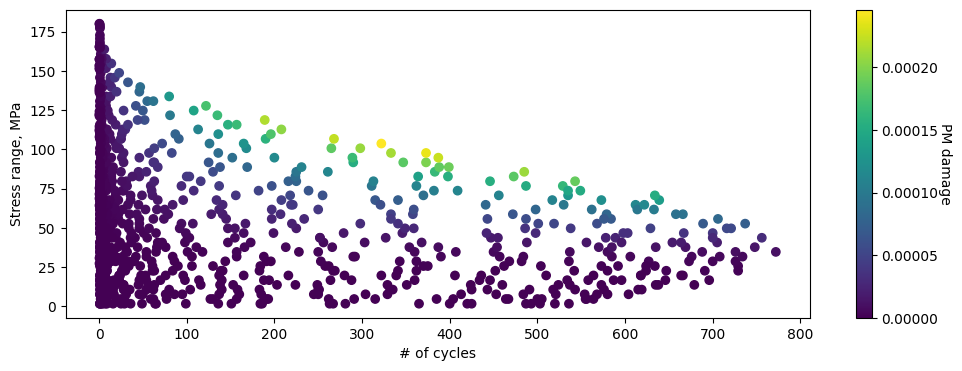

In [47]:
df.miner.plot_histogram()

## Nonlinear Damage Accumulation Models

The non-linear damage accumulation models define additional exponents based on cycles to failure (manson halford exponents) or based on stress amplitude, ultimate stress and stress range (Pavlov Exponents). These exponents are then accumulated with the damage values corresponding to each fatigue cycle histogram as follows:


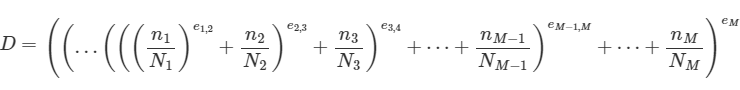

The non-linear damage accumulation models are implemented using `py_fatigue` as follows:
`py_fatigue.damage.stress_life.get_nonlinear_damage(damage_rule, cycle_count, sn_curve, **kwargs)`
damage_rule = `'pavlou', 'manson', 'manson and halford', 'manson halford', 'leve', 'si jian', 'si jian et al'`
**kwargs = key word arguments are0 : 

`base_exponent`: The exponent for the damage rule.

`ultimate_stress`: The ultimate stress.

The Pavlou Damage rule can be implemented on the `cycle_count` instance of the above generated random signal as:

In [48]:
pf.damage.stress_life.get_nonlinear_damage('pavlou', cycle_count, sn2, ultimate_stress=900, base_exponent = -0.75)

array([1.19166217e-11, 3.57097129e-01, 4.01008776e-01, ...,
       1.09358674e+00, 1.10271260e+00, 1.10271262e+00])

Similarly, the manson halford accumulation model could also be implemented as follows:

In [49]:
pf.damage.stress_life.get_nonlinear_damage('manson and halford', cycle_count, sn2, ultimate_stress=900, base_exponent = 0.4)

array([1.44805362e-14, 0.00000000e+00, 1.12878884e-08, ...,
       4.93776809e-01, 5.42166893e-01, 5.42166914e-01])

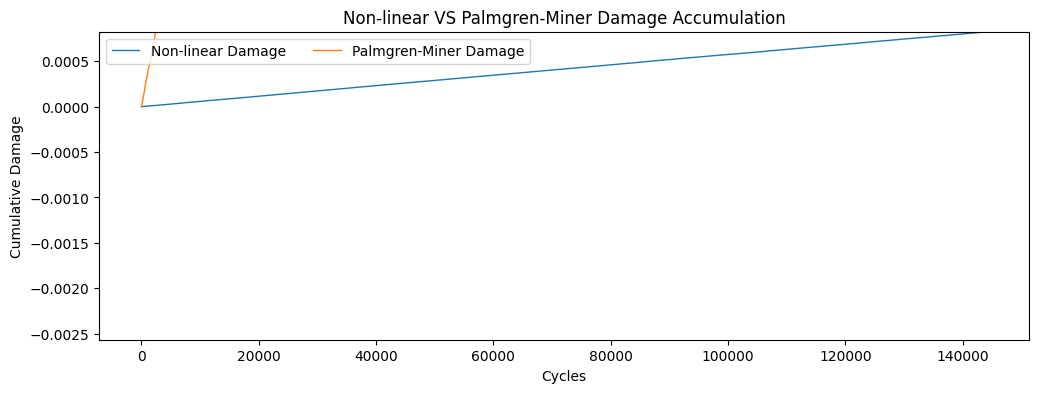

(array([1.08553061e-12, 1.60252292e-14, 4.01631559e-09, ...,
        5.01431590e-09, 3.76414113e-10, 2.59022838e-10]),
 array([1.08553061e-12, 1.10155584e-12, 4.01741715e-09, ...,
        8.24790397e-04, 8.24790774e-04, 8.24791033e-04]),
 <Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Non-linear VS Palmgren-Miner Damage Accumulation'}, xlabel='Cycles', ylabel='Cumulative Damage'>)

In [51]:
pf.damage.stress_life.get_nonlinear_damage_with_dca('pavlou', cycle_count, sn2, damage_bands=np.linspace(0, 1, 100), ultimate_stress=900, base_exponent = -0.75, plot=True)